In [1]:
import pandas as pd

# Load the Excel file
file_path = "/Users/Emmanuel/Documents/Internship program/Clinical Statistics 2025/Data Base_ALSIN_3.2 March 2025.xlsx"
sheet_name = "Clinical_2025+"

# Read the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows to verify
print("Data loaded successfully!")
print(f"Number of rows: {len(df)}")
print("\nFirst few rows of the dataset:")
df.head()

Data loaded successfully!
Number of rows: 103

First few rows of the dataset:


,Patient Identifier,Pathology,Mutation_Allele_1,Mutation_Allele_2,HGVS_Allele_1,HGVS_Allele_2,Allele_1_Variant_Type,Allele_1_Consequence_Terms,Allele_1_transcript_id,Allele_1_gene_symbol,...,Age at last MAS evaluation (years),Elbow.1,Wrist.1,Fingers.1,Thumb.1,Hamstrings.1,Quadriceps.1,Gastrocnemius.1,Soleus.1,Last MAS Evaluation
0,1,IAHSP,c.4368delG,c.4831C>T,ENST00000264276.11:c.4368delG,ENST00000264276.11:c.4831C>T,frameshift,frameshift_variant,ENST00000264276,ALS2,...,6.08,0,0,0,0,2,2,3,3.0,10.0
1,2,IAHSP,c.529G>C,c.3304G>A,ENST00000264276.11:c.529G>C,ENST00000264276.11:c.3304G>A,missense,missense_variant,ENST00000264276,ALS2,...,5.75,0,0,0,0,0,0,1+,0.0,0.0
2,3,IAHSP,c.4832G>C,c.1425_1428del,ENST00000264276.11:c.4832G>C,ENST00000264276.11:c.1425_1428del,missense,missense_variant,ENST00000264276,ALS2,...,9.00,1+,1+,1+,1+,1+,1+,3,3.0,6.0
3,7,IAHSP,c.4368delG,c.4368delG,ENST00000264276.11:c.4368delG,ENST00000264276.11:c.4368delG,frameshift,frameshift_variant,ENST00000264276,ALS2,...,16.40,3,3,2,2,3,3,3,3.0,22.0
4,8,IAHSP,c.4368delG,c.4368delG,ENST00000264276.11:c.4368delG,ENST00000264276.11:c.4368delG,frameshift,frameshift_variant,ENST00000264276,ALS2,...,15.00,3,3,2,2,3,3,3,3.0,22.0


In [11]:
import pandas as pd
import plotly.express as px

# Load the data
file_path = "/Users/Emmanuel/Documents/Internship program/Clinical Statistics 2025/Data Base_ALSIN_3.2 March 2025.xlsx"
sheet_name = "Clinical_2025+"
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Filter for IAHSP patients
iahsp_df = df[df['Pathology'] == 'IAHSP'].copy()

# Clean country names
def clean_country(country_str):
    if pd.isna(country_str):
        return None
        
    country_str = str(country_str).strip()
    
    # Handle special cases
    if 'Darius Ebrahimi-Fakhari' in country_str or 'Carter' in country_str:
        return 'USA'
    if any(x in country_str for x in ['Battini', 'Santorelli', 'Della Vecchia', 'Capra', 'Piscopo']):
        return 'Italy'
    if 'Hadano' in country_str:
        return 'Kuwait'
    if 'Buchari-Jewish' in country_str:
        return 'Israel'
    
    # Clean up generic patterns
    country_str = country_str.split('(')[0].split(',')[0].strip()
    return {'Turkey': 'Türkiye', 'US': 'USA'}.get(country_str, country_str)

# Apply cleaning and count
iahsp_df['Cleaned_Country'] = iahsp_df['Origin of Parents'].apply(clean_country)
country_counts = iahsp_df['Cleaned_Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# ISO codes mapping
iso_codes = {
    'USA': 'USA', 'Türkiye': 'TUR', 'Iran': 'IRN', 'Pakistan': 'PAK',
    'Italy': 'ITA', 'China': 'CHN', 'Algeria': 'DZA', 'Spain': 'ESP',
    'Saudi Arabia': 'SAU', 'Kuwait': 'KWT', 'Hungary': 'HUN', 'Netherlands': 'NLD',
    'Israel': 'ISR', 'Poland': 'POL', 'France': 'FRA', 'Germany': 'DEU', 'Portugal': 'PRT'
}

# Add ISO codes and filter valid ones
country_counts['ISO'] = country_counts['Country'].map(iso_codes)
country_counts = country_counts.dropna(subset=['ISO'])

# Create the choropleth map
fig = px.choropleth(
    country_counts,
    locations="ISO",
    color="Count",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.Plasma,
    projection="natural earth",
    title="Geographical Distribution of IAHSP Patients (n=83)"
)

# Force colorbar on the right and tighten vertical spacing
fig.update_layout(
    width=1100,
    height=650,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        showocean=True,
        oceancolor='LightBlue',
        showlakes=True,
        lakecolor='LightBlue',
        projection_scale=1.05,   # slightly zoomed but leaves room for colorbar
        lonaxis=dict(showgrid=False),
        lataxis=dict(showgrid=False)
    ),
    margin=dict(l=0, r=120, t=60, b=20),  # smaller top margin → title closer to map
    coloraxis_colorbar=dict(
        title="Number of Patients",
        thicknessmode="pixels",
        thickness=18,
        lenmode="fraction",
        len=0.7,
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=1.03  # push to the right of the map
    ),
    title={
        'text': "Geographical Distribution of IAHSP Patients",
        'y': 0.94,       # bring title closer to the map
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=16, family="Arial")
    },
    font=dict(
        family="Arial",
        size=12,
        color="black"
    )
)

# Improve hover template
fig.update_traces(
    hovertemplate="<b>%{hovertext}</b><br>" +
                  "Patients: %{z}<br>" +
                  "<extra></extra>"
)

# Show the figure
fig.show()

# Display the data table
print("IAHSP Patient Distribution:")
print(
    country_counts[['Country', 'Count']]
    .sort_values('Count', ascending=False)
    .to_string(index=False)
)


IAHSP Patient Distribution:
     Country  Count
     Türkiye     14
        Iran     11
    Pakistan     11
       Italy     11
         USA      6
       China      4
      Kuwait      3
       Spain      3
     Algeria      3
     Hungary      2
Saudi Arabia      2
 Netherlands      2
      Israel      2
      Poland      2
     Germany      1
    Portugal      1
      France      1


prepare an A4 image for publication, from the four equal panel of the figure, A. @251018 ALS2 IAHSP Tesi.ipynb Cell:9:0-110 , B.

<Figure size 3507x2481 with 3 Axes>

Loading data from Clinical_2025+ ...
IAHSP patients found: 83


/var/folders/c2/kv13nb2s4099cpzrg4h4s0lm0000gp/T/ipykernel_6034/2219371730.py:208: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax2.boxplot(


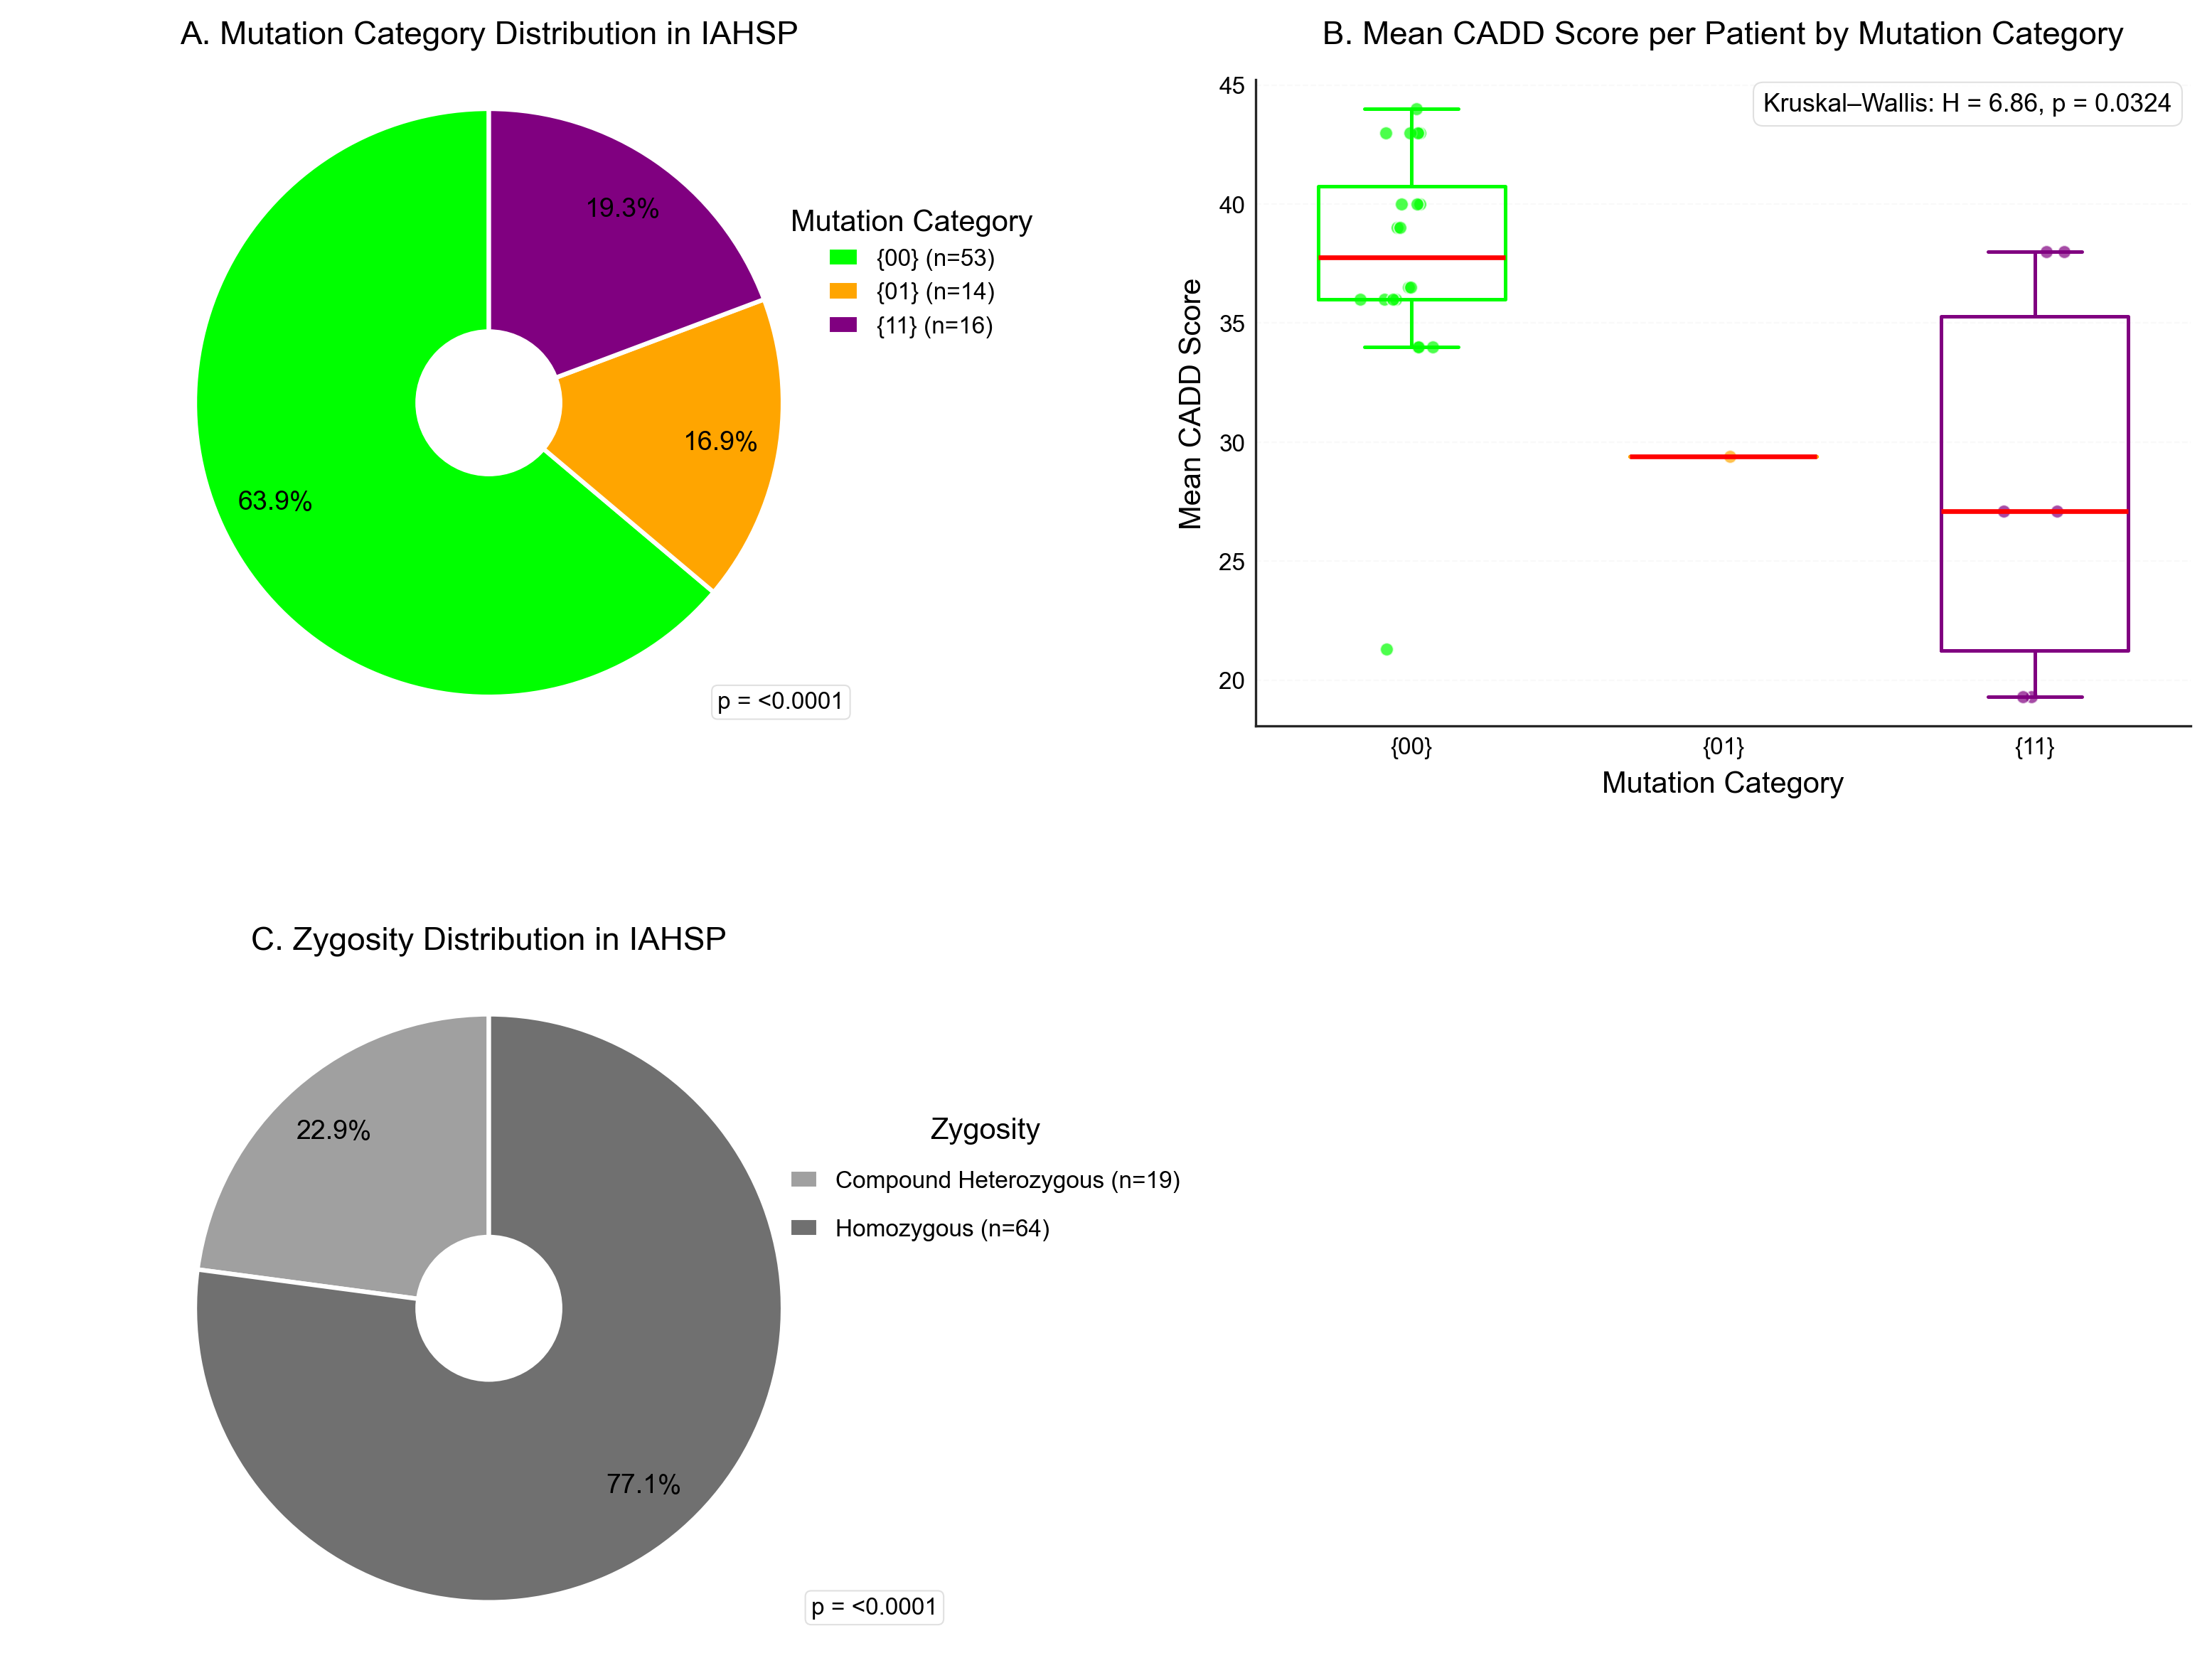


MUTATION CATEGORY DISTRIBUTION (IAHSP, PANEL A)
+---------------------+---------+------------------+
| Mutation Category   |   Count |   Percentage (%) |
+=====================+=========+==================+
| {00}                |      53 |             63.9 |
+---------------------+---------+------------------+
| {01}                |      14 |             16.9 |
+---------------------+---------+------------------+
| {11}                |      16 |             19.3 |
+---------------------+---------+------------------+
Chi-square GOF vs equal ['{00}', '{01}', '{11}']: p = <0.0001

MEAN CADD SCORE BY MUTATION CATEGORY (IAHSP, PANEL B)
+---------------------+-----+--------+----------+--------+-------+-------+
| Mutation Category   |   N |   Mean |   Median |     SD |   Min |   Max |
+=====================+=====+========+==========+========+=======+=======+
| {00}                |  20 |  37.71 |    37.75 |   5.11 |  21.3 |  44   |
+---------------------+-----+--------+----------+--------

In [10]:
# ==== ALS2 IAHSP – MUTATION CATEGORY, CADD & ZYGOSITY (A4 2x2) ====

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
from scipy.stats import chisquare, kruskal
from tabulate import tabulate

# -------------------------------------------------------------------
# 0. SETTINGS & DATA LOADING (CLINICAL_2025+)
# -------------------------------------------------------------------
file_path = '/Users/Emmanuel/Documents/Internship program/Clinical Statistics 2025/Data Base_ALSIN_3.2 March 2025.xlsx'
sheet_name = 'Clinical_2025+'

print("Loading data from Clinical_2025+ ...")
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Keep only IAHSP patients
df = df[df['Pathology'] == 'IAHSP'].copy()
print(f"IAHSP patients found: {len(df)}")

def format_p(p):
    return "<0.0001" if p < 0.0001 else f"{p:.4f}"

# -------------------------------------------------------------------
# 1. PANEL A – MUTATION CATEGORY DISTRIBUTION
# -------------------------------------------------------------------
mut_col = 'Mutation Category'
df[mut_col] = df[mut_col].astype(str).str.strip()

category_order = ['{00}', '{01}', '{11}']
mut_counts = df[mut_col].value_counts().reindex(category_order, fill_value=0)
mut_counts = mut_counts.reset_index()
mut_counts.columns = ['Mutation Category', 'Count']

total_mut = mut_counts['Count'].sum()
mut_counts['Percentage'] = (mut_counts['Count'] / total_mut * 100).round(1)

# Colors
mut_color_map = {'{00}': '#00FF00', '{01}': '#FFA500', '{11}': '#800080'}
colors_A = [mut_color_map[c] for c in mut_counts['Mutation Category']]

# Chi-square GOF vs equal proportions
obs_A = mut_counts['Count'].values.astype(float)
if total_mut > 0 and (obs_A > 0).sum() > 1:
    expected_A = np.full(obs_A.shape, total_mut / len(obs_A), dtype=float)
    chi2_A, p_A = chisquare(f_obs=obs_A, f_exp=expected_A)
    p_str_A = format_p(p_A)
else:
    p_str_A = "N/A"

# -------------------------------------------------------------------
# 2. PANEL B – MEAN CADD SCORE
# -------------------------------------------------------------------
score_cols = ['CADD Score Allele 1', 'CADD Score Allele 2']
for col in score_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Mean CADD Score'] = df[score_cols].mean(axis=1)

groups_B = []
labels_B = []
for cat in category_order:
    vals = df.loc[df[mut_col] == cat, 'Mean CADD Score'].dropna()
    if len(vals) > 0:
        groups_B.append(vals.values.astype(float))
        labels_B.append(cat)

outline_colors_B = [mut_color_map[c] for c in labels_B]

if len(groups_B) > 1:
    stat_B, p_B = kruskal(*groups_B)
    p_str_B = format_p(p_B)
else:
    stat_B, p_B, p_str_B = np.nan, np.nan, "N/A"

# -------------------------------------------------------------------
# 3. PANEL C – ZYGOSITY DISTRIBUTION
# -------------------------------------------------------------------
def clean_zyg(z):
    if pd.isna(z):
        return 'Other'
    z = str(z).strip().lower()
    if 'compound' in z:
        return 'Compound Heterozygous'
    if 'homo' in z:
        return 'Homozygous'
    return 'Other'

zyg_labels = df['Zygosity'].apply(clean_zyg)
zyg_counts = zyg_labels.value_counts().reindex(
    ['Compound Heterozygous', 'Homozygous', 'Other'], fill_value=0
)
zyg_percent = (zyg_counts / zyg_counts.sum() * 100).round(1)

summary_zyg = pd.DataFrame({
    'Zygosity Type': zyg_counts.index,
    'Count': zyg_counts.values,
    'Percentage': zyg_percent.values
})

zyg_color_map = {
    'Compound Heterozygous': '#A0A0A0',
    'Homozygous': '#707070',
    'Other': '#E0E0E0'
}

# Chi-square GOF only on Compound + Homozygous (remove 'Other')
mask_valid = summary_zyg['Zygosity Type'] != 'Other'
obs_C = summary_zyg.loc[mask_valid, 'Count'].values.astype(float)
if len(obs_C) > 1 and obs_C.sum() > 0:
    expected_C = np.full(obs_C.shape, obs_C.sum() / len(obs_C), dtype=float)
    chi2_C, p_C = chisquare(f_obs=obs_C, f_exp=expected_C)
    p_str_C = format_p(p_C)
else:
    chi2_C, p_C, p_str_C = np.nan, np.nan, "N/A"

# -------------------------------------------------------------------
# 4. A4 2×2 LAYOUT
# -------------------------------------------------------------------
plt.style.use('seaborn-v0_8-white')
plt.rcParams.update({
    'font.size': 10,
    'font.family': 'Arial',
    'axes.titlesize': 11,
    'axes.labelsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'grid.alpha': 0.10,
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black'
})

fig = plt.figure(figsize=(11.69, 8.27), dpi=300)
gs = GridSpec(
    2, 2, figure=fig,
    width_ratios=[1, 1],
    height_ratios=[1, 1],
    wspace=0.32, hspace=0.40,
    left=0.08, right=0.95, top=0.95, bottom=0.07
)

# ------------------ PANEL A: Mutation category donut ------------------
ax1 = fig.add_subplot(gs[0, 0])

wedges_A, texts_A, autotexts_A = ax1.pie(
    mut_counts['Count'],
    labels=[''] * len(mut_counts),   # NO labels around the pie
    colors=colors_A,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5, 'width': 0.8},
    textprops={'fontsize': 9},
    pctdistance=0.80,
    labeldistance=1.10
)

# Make percentage text strong black
for autotext in autotexts_A:
    autotext.set_color('black')
    autotext.set_fontweight('medium')

centre_circle_A = plt.Circle((0, 0), 0.25, color='white', linewidth=0)
ax1.add_artist(centre_circle_A)
ax1.axis('equal')
ax1.set_title('A. Mutation Category Distribution in IAHSP', fontweight='medium', pad=12)

# p-value box
ax1.text(
    0.88, 0.02,
    f'p = {p_str_A}',
    ha='right', va='bottom',
    transform=ax1.transAxes,
    fontsize=8,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.9,
              edgecolor='#dddddd', pad=0.25, linewidth=0.5)
)

# Legend with counts (mutation categories)
legend_A = [
    mpatches.Patch(
        facecolor=mut_color_map[c],
        edgecolor='white',
        linewidth=0.5,
        label=f"{c} (n={cnt})"
    )
    for c, cnt in zip(mut_counts['Mutation Category'], mut_counts['Count'])
]
ax1.legend(
    handles=legend_A,
    title="Mutation Category",
    loc='center left',
    bbox_to_anchor=(0.80, 0.7),
    frameon=False,
    handlelength=1.2
)

# ------------------ PANEL B: CADD boxplot ------------------
ax2 = fig.add_subplot(gs[0, 1])

box = ax2.boxplot(
    groups_B,
    labels=labels_B,
    patch_artist=False,
    medianprops=dict(color='red', linewidth=1.6),
    boxprops=dict(linewidth=1.2),
    whiskerprops=dict(linewidth=1.2),
    capprops=dict(linewidth=1.2),
    showfliers=False,
    widths=0.6
)

# Outline colors
for i, b in enumerate(box['boxes']):
    b.set_color(outline_colors_B[i])
for i, w in enumerate(box['whiskers']):
    w.set_color(outline_colors_B[i // 2])
for i, c in enumerate(box['caps']):
    c.set_color(outline_colors_B[i // 2])

# Jittered points
for i, vals in enumerate(groups_B):
    x = np.random.normal(i + 1, 0.06, size=len(vals))
    ax2.scatter(
        x, vals,
        color=outline_colors_B[i],
        alpha=0.7,
        s=20,
        linewidths=0.5,
        edgecolors='white'
    )

ax2.set_ylabel('Mean CADD Score', fontsize=10)
ax2.set_xlabel('Mutation Category', fontsize=10)
ax2.set_title('B. Mean CADD Score per Patient by Mutation Category', fontweight='medium', pad=12)

ax2.grid(axis='y', linestyle='--', alpha=0.10, linewidth=0.5)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(0.8)
ax2.spines['bottom'].set_linewidth(0.8)

ax2.text(
    0.98, 0.98,
    f'Kruskal–Wallis: H = {stat_B:.2f}, p = {p_str_B}',
    transform=ax2.transAxes,
    ha='right', va='top',
    fontsize=8.5,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.9,
              edgecolor='#dddddd', pad=0.4, linewidth=0.5)
)

# ------------------ PANEL C: Zygosity donut (no "Other" slice) ------------------
ax3 = fig.add_subplot(gs[1, 0])

summary_zyg_filtered = summary_zyg[summary_zyg['Zygosity Type'] != 'Other']

wedges_C, texts_C, autotexts_C = ax3.pie(
    summary_zyg_filtered['Count'],
    labels=[''] * len(summary_zyg_filtered),   # remove labels around pie
    colors=[zyg_color_map[z] for z in summary_zyg_filtered['Zygosity Type']],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5, 'width': 0.8},
    textprops={'fontsize': 9},
    pctdistance=0.80
)

for autotext in autotexts_C:
    autotext.set_color('black')
    autotext.set_fontweight('medium')

centre_circle_C = plt.Circle((0, 0), 0.25, color='white', linewidth=0)
ax3.add_artist(centre_circle_C)
ax3.axis('equal')

ax3.set_title('C. Zygosity Distribution in IAHSP', fontweight='medium', pad=12)

ax3.text(
    0.98, 0.02,
    f'p = {p_str_C}',
    ha='right', va='bottom',
    transform=ax3.transAxes,
    fontsize=8,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.9,
              edgecolor='#dddddd', pad=0.25, linewidth=0.5)
)

# Legend only for Compound + Homozygous
legend_C = [
    mpatches.Patch(
        facecolor=zyg_color_map[z],
        edgecolor='white',
        linewidth=0.5,
        label=f"{z} (n={cnt})"
    )
    for z, cnt in zip(summary_zyg_filtered['Zygosity Type'], summary_zyg_filtered['Count'])
]
ax3.legend(
    handles=legend_C,
    title="Zygosity",
    loc="center left",
    bbox_to_anchor=(0.80, 0.7),
    frameon=False,
    handlelength=1.1,
    labelspacing=1.1
)

# ------------------ PANEL D: empty ------------------
ax4 = fig.add_subplot(gs[1, 1])
ax4.axis('off')

# ------------------ SAVE & SHOW ------------------
fig.savefig('IAHSP_Mutation_CADD_Zygosity_A4_2x2.pdf', dpi=300, bbox_inches='tight')
fig.savefig('IAHSP_Mutation_CADD_Zygosity_A4_2x2.png', dpi=300, bbox_inches='tight')
plt.show()

# -------------------------------------------------------------------
# 5. NUMERIC SUMMARIES (OPTIONAL, CONSOLE)
# -------------------------------------------------------------------
print("\n" + "="*70)
print("MUTATION CATEGORY DISTRIBUTION (IAHSP, PANEL A)")
print("="*70)
print(tabulate(
    mut_counts[['Mutation Category', 'Count', 'Percentage']],
    headers=['Mutation Category', 'Count', 'Percentage (%)'],
    tablefmt='grid',
    showindex=False
))
print(f"Chi-square GOF vs equal {category_order}: p = {p_str_A}")

print("\n" + "="*70)
print("MEAN CADD SCORE BY MUTATION CATEGORY (IAHSP, PANEL B)")
print("="*70)
summary_B = df.groupby(mut_col)['Mean CADD Score'].agg(
    N='count',
    Mean='mean',
    Median='median',
    SD='std',
    Min='min',
    Max='max'
).round(2)
print(tabulate(summary_B.reset_index(), headers='keys', tablefmt='grid', showindex=False))
print(f"Kruskal–Wallis H = {stat_B:.2f}, p = {p_str_B}")

print("\n" + "="*70)
print("ZYGOSITY DISTRIBUTION IN IAHSP (PANEL C)")
print("="*70)
print(tabulate(summary_zyg, headers='keys', tablefmt='grid', showindex=False))
print(f"Chi-square GOF vs equal zygosity (Compound vs Homozygous): p = {p_str_C}")
print("="*70)


Loading data from Sheet2 ...
IAHSP patients found: 83


/var/folders/c2/kv13nb2s4099cpzrg4h4s0lm0000gp/T/ipykernel_3676/1291770077.py:208: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax2.boxplot(


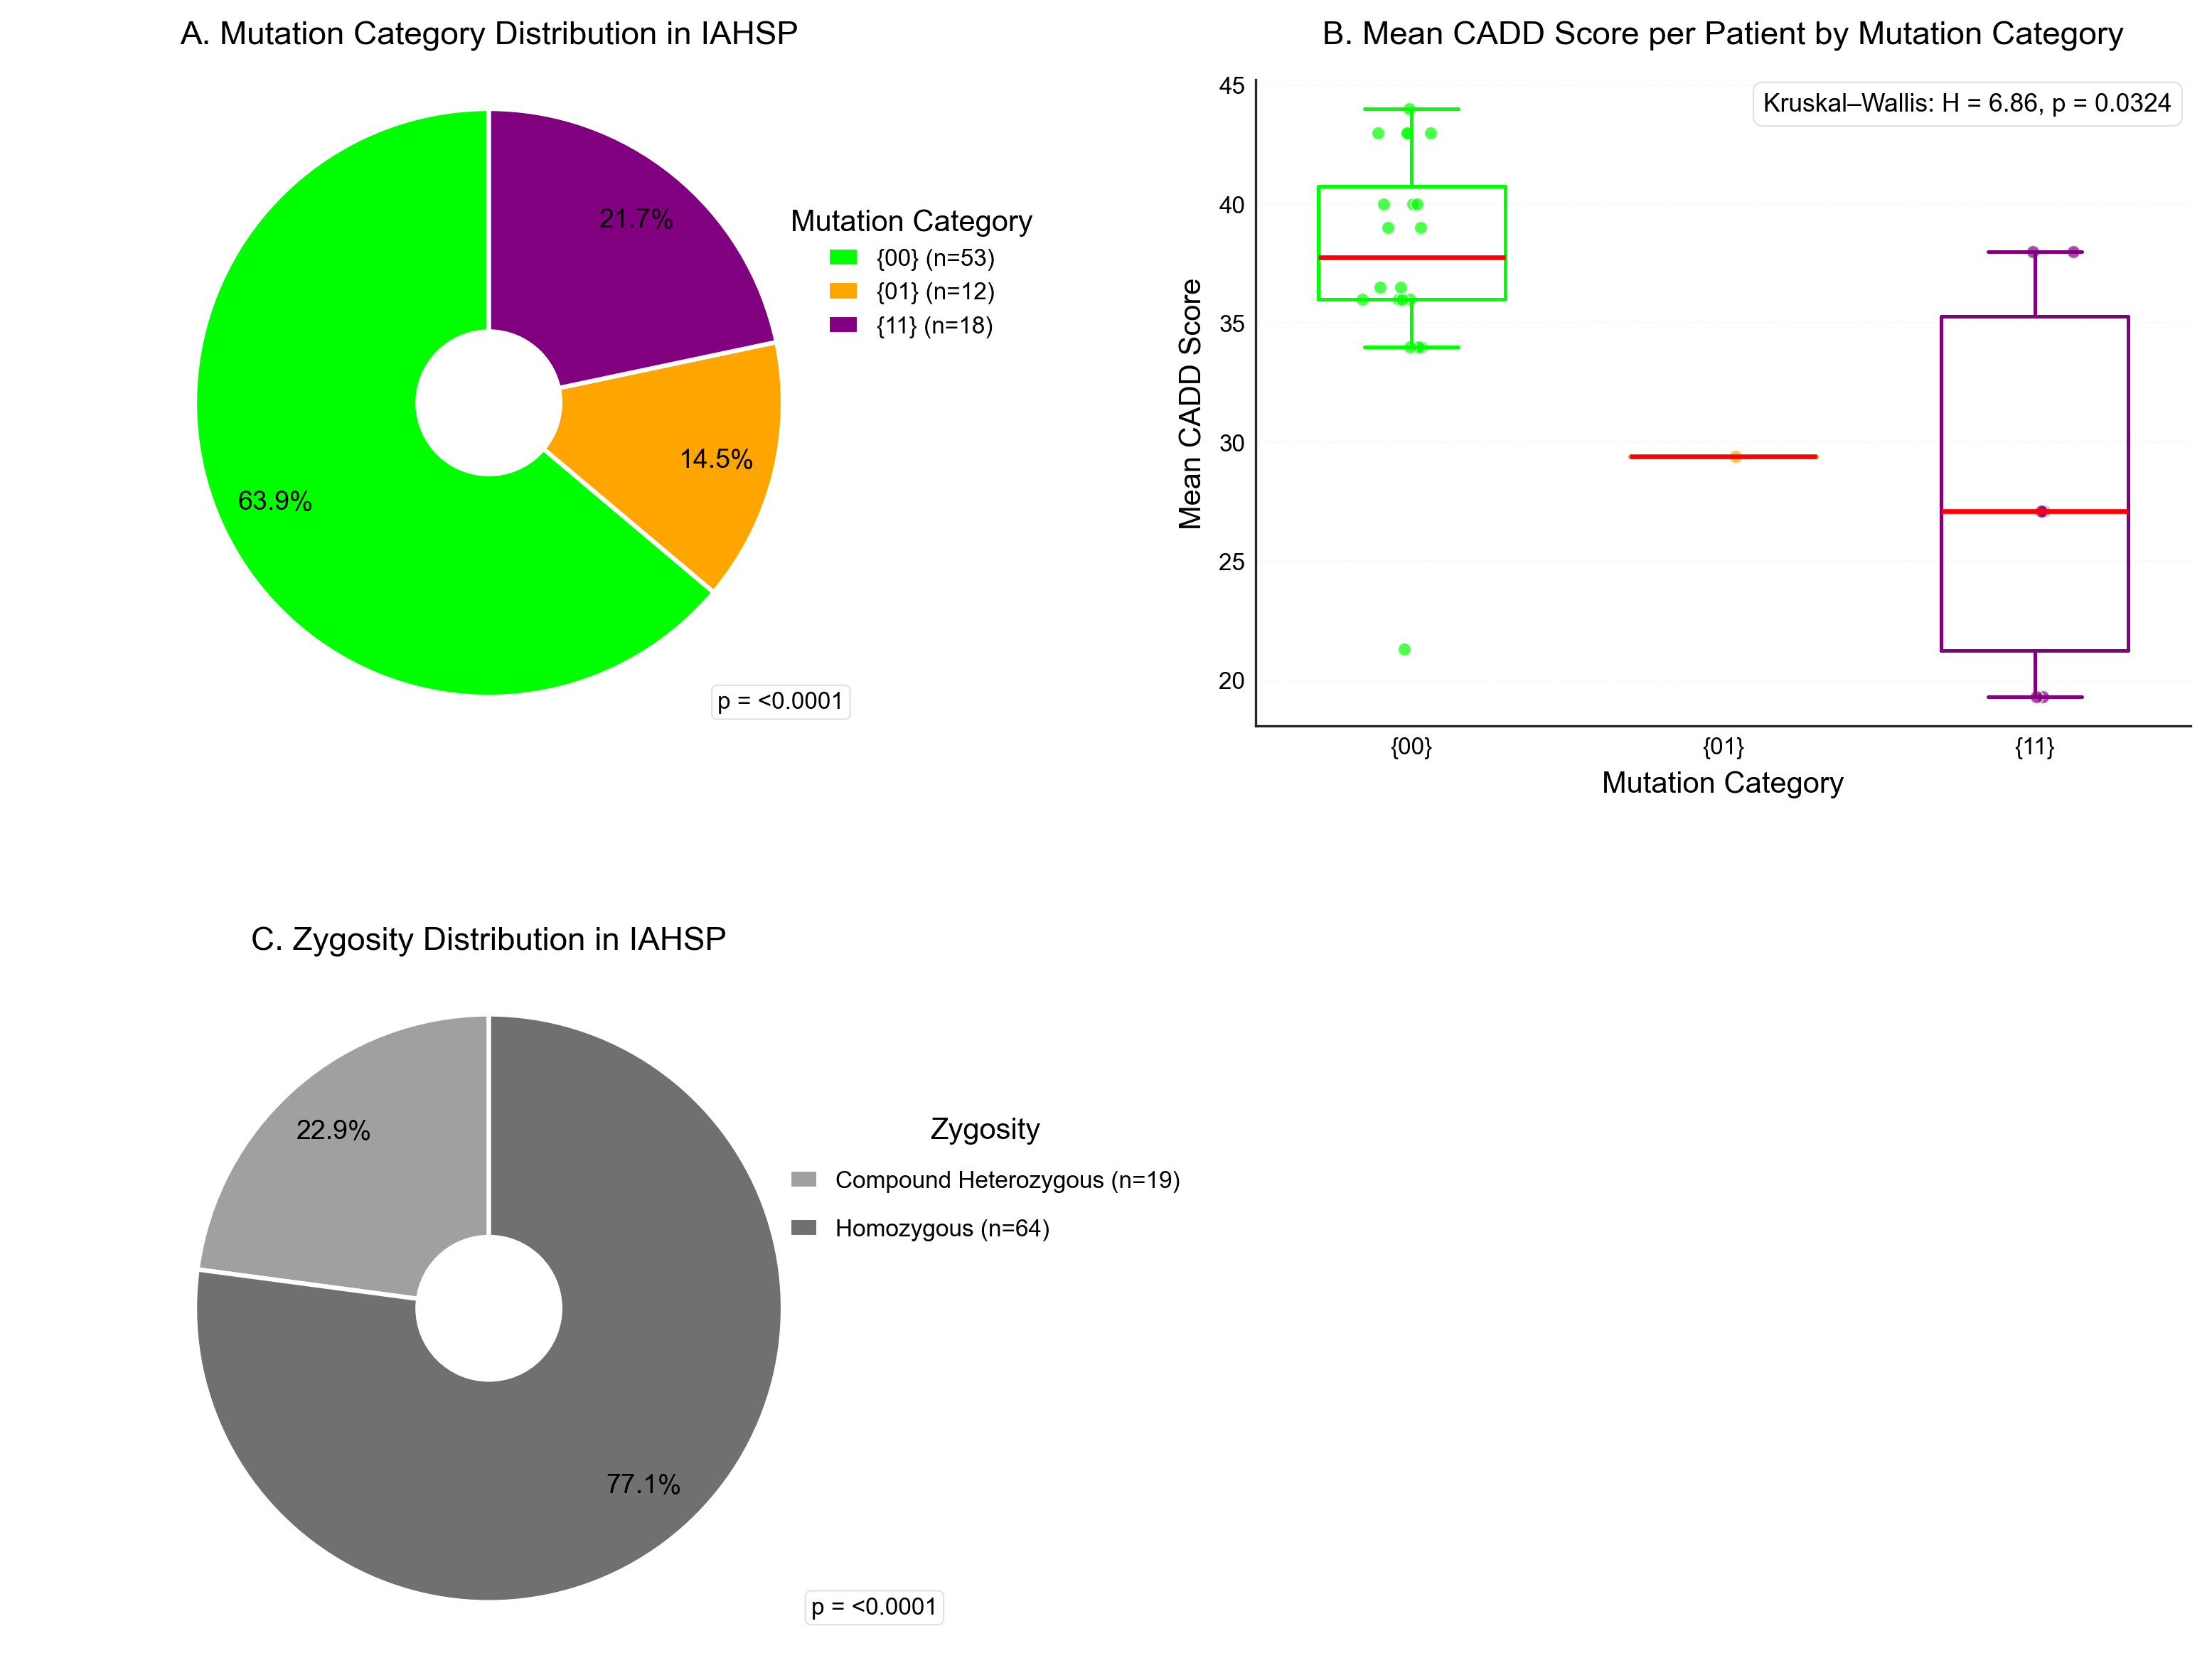


MUTATION CATEGORY DISTRIBUTION (IAHSP, PANEL A)
+---------------------+---------+------------------+
| Mutation Category   |   Count |   Percentage (%) |
+=====================+=========+==================+
| {00}                |      53 |             63.9 |
+---------------------+---------+------------------+
| {01}                |      12 |             14.5 |
+---------------------+---------+------------------+
| {11}                |      18 |             21.7 |
+---------------------+---------+------------------+
Chi-square GOF vs equal ['{00}', '{01}', '{11}']: p = <0.0001

MEAN CADD SCORE BY MUTATION CATEGORY (IAHSP, PANEL B)
+---------------------+-----+--------+----------+--------+-------+-------+
| Mutation Category   |   N |   Mean |   Median |     SD |   Min |   Max |
+=====================+=====+========+==========+========+=======+=======+
| {00}                |  20 |  37.71 |    37.75 |   5.11 |  21.3 |  44   |
+---------------------+-----+--------+----------+--------

In [3]:
# ==== ALS2 IAHSP – MUTATION CATEGORY, CADD & ZYGOSITY (A4 2x2) ====

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
from scipy.stats import chisquare, kruskal
from tabulate import tabulate

# -------------------------------------------------------------------
# 0. SETTINGS & DATA LOADING (CLINICAL_2025+)
# -------------------------------------------------------------------
file_path = '/Users/Emmanuel/Documents/Internship program/Clinical Statistics 2025/AData Base_ALSIN_3.2 March 2025.xlsx'
sheet_name = 'Sheet2'

print("Loading data from Sheet2 ...")
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Keep only IAHSP patients
df = df[df['Pathology'] == 'IAHSP'].copy()
print(f"IAHSP patients found: {len(df)}")

def format_p(p):
    return "<0.0001" if p < 0.0001 else f"{p:.4f}"

# -------------------------------------------------------------------
# 1. PANEL A – MUTATION CATEGORY DISTRIBUTION
# -------------------------------------------------------------------
mut_col = 'Mutation Category'
df[mut_col] = df[mut_col].astype(str).str.strip()

category_order = ['{00}', '{01}', '{11}']
mut_counts = df[mut_col].value_counts().reindex(category_order, fill_value=0)
mut_counts = mut_counts.reset_index()
mut_counts.columns = ['Mutation Category', 'Count']

total_mut = mut_counts['Count'].sum()
mut_counts['Percentage'] = (mut_counts['Count'] / total_mut * 100).round(1)

# Colors
mut_color_map = {'{00}': '#00FF00', '{01}': '#FFA500', '{11}': '#800080'}
colors_A = [mut_color_map[c] for c in mut_counts['Mutation Category']]

# Chi-square GOF vs equal proportions
obs_A = mut_counts['Count'].values.astype(float)
if total_mut > 0 and (obs_A > 0).sum() > 1:
    expected_A = np.full(obs_A.shape, total_mut / len(obs_A), dtype=float)
    chi2_A, p_A = chisquare(f_obs=obs_A, f_exp=expected_A)
    p_str_A = format_p(p_A)
else:
    p_str_A = "N/A"

# -------------------------------------------------------------------
# 2. PANEL B – MEAN CADD SCORE
# -------------------------------------------------------------------
score_cols = ['CADD Score Allele 1', 'CADD Score Allele 2']
for col in score_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Mean CADD Score'] = df[score_cols].mean(axis=1)

groups_B = []
labels_B = []
for cat in category_order:
    vals = df.loc[df[mut_col] == cat, 'Mean CADD Score'].dropna()
    if len(vals) > 0:
        groups_B.append(vals.values.astype(float))
        labels_B.append(cat)

outline_colors_B = [mut_color_map[c] for c in labels_B]

if len(groups_B) > 1:
    stat_B, p_B = kruskal(*groups_B)
    p_str_B = format_p(p_B)
else:
    stat_B, p_B, p_str_B = np.nan, np.nan, "N/A"

# -------------------------------------------------------------------
# 3. PANEL C – ZYGOSITY DISTRIBUTION
# -------------------------------------------------------------------
def clean_zyg(z):
    if pd.isna(z):
        return 'Other'
    z = str(z).strip().lower()
    if 'compound' in z:
        return 'Compound Heterozygous'
    if 'homo' in z:
        return 'Homozygous'
    return 'Other'

zyg_labels = df['Zygosity'].apply(clean_zyg)
zyg_counts = zyg_labels.value_counts().reindex(
    ['Compound Heterozygous', 'Homozygous', 'Other'], fill_value=0
)
zyg_percent = (zyg_counts / zyg_counts.sum() * 100).round(1)

summary_zyg = pd.DataFrame({
    'Zygosity Type': zyg_counts.index,
    'Count': zyg_counts.values,
    'Percentage': zyg_percent.values
})

zyg_color_map = {
    'Compound Heterozygous': '#A0A0A0',
    'Homozygous': '#707070',
    'Other': '#E0E0E0'
}

# Chi-square GOF only on Compound + Homozygous (remove 'Other')
mask_valid = summary_zyg['Zygosity Type'] != 'Other'
obs_C = summary_zyg.loc[mask_valid, 'Count'].values.astype(float)
if len(obs_C) > 1 and obs_C.sum() > 0:
    expected_C = np.full(obs_C.shape, obs_C.sum() / len(obs_C), dtype=float)
    chi2_C, p_C = chisquare(f_obs=obs_C, f_exp=expected_C)
    p_str_C = format_p(p_C)
else:
    chi2_C, p_C, p_str_C = np.nan, np.nan, "N/A"

# -------------------------------------------------------------------
# 4. A4 2×2 LAYOUT
# -------------------------------------------------------------------
plt.style.use('seaborn-v0_8-white')
plt.rcParams.update({
    'font.size': 10,
    'font.family': 'Arial',
    'axes.titlesize': 11,
    'axes.labelsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'grid.alpha': 0.10,
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black'
})

fig = plt.figure(figsize=(11.69, 8.27), dpi=300)
gs = GridSpec(
    2, 2, figure=fig,
    width_ratios=[1, 1],
    height_ratios=[1, 1],
    wspace=0.32, hspace=0.40,
    left=0.08, right=0.95, top=0.95, bottom=0.07
)

# ------------------ PANEL A: Mutation category donut ------------------
ax1 = fig.add_subplot(gs[0, 0])

wedges_A, texts_A, autotexts_A = ax1.pie(
    mut_counts['Count'],
    labels=[''] * len(mut_counts),   # NO labels around the pie
    colors=colors_A,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5, 'width': 0.8},
    textprops={'fontsize': 9},
    pctdistance=0.80,
    labeldistance=1.10
)

# Make percentage text strong black
for autotext in autotexts_A:
    autotext.set_color('black')
    autotext.set_fontweight('medium')

centre_circle_A = plt.Circle((0, 0), 0.25, color='white', linewidth=0)
ax1.add_artist(centre_circle_A)
ax1.axis('equal')
ax1.set_title('A. Mutation Category Distribution in IAHSP', fontweight='medium', pad=12)

# p-value box
ax1.text(
    0.88, 0.02,
    f'p = {p_str_A}',
    ha='right', va='bottom',
    transform=ax1.transAxes,
    fontsize=8,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.9,
              edgecolor='#dddddd', pad=0.25, linewidth=0.5)
)

# Legend with counts (mutation categories)
legend_A = [
    mpatches.Patch(
        facecolor=mut_color_map[c],
        edgecolor='white',
        linewidth=0.5,
        label=f"{c} (n={cnt})"
    )
    for c, cnt in zip(mut_counts['Mutation Category'], mut_counts['Count'])
]
ax1.legend(
    handles=legend_A,
    title="Mutation Category",
    loc='center left',
    bbox_to_anchor=(0.80, 0.7),
    frameon=False,
    handlelength=1.2
)

# ------------------ PANEL B: CADD boxplot ------------------
ax2 = fig.add_subplot(gs[0, 1])

box = ax2.boxplot(
    groups_B,
    labels=labels_B,
    patch_artist=False,
    medianprops=dict(color='red', linewidth=1.6),
    boxprops=dict(linewidth=1.2),
    whiskerprops=dict(linewidth=1.2),
    capprops=dict(linewidth=1.2),
    showfliers=False,
    widths=0.6
)

# Outline colors
for i, b in enumerate(box['boxes']):
    b.set_color(outline_colors_B[i])
for i, w in enumerate(box['whiskers']):
    w.set_color(outline_colors_B[i // 2])
for i, c in enumerate(box['caps']):
    c.set_color(outline_colors_B[i // 2])

# Jittered points
for i, vals in enumerate(groups_B):
    x = np.random.normal(i + 1, 0.06, size=len(vals))
    ax2.scatter(
        x, vals,
        color=outline_colors_B[i],
        alpha=0.7,
        s=20,
        linewidths=0.5,
        edgecolors='white'
    )

ax2.set_ylabel('Mean CADD Score', fontsize=10)
ax2.set_xlabel('Mutation Category', fontsize=10)
ax2.set_title('B. Mean CADD Score per Patient by Mutation Category', fontweight='medium', pad=12)

ax2.grid(axis='y', linestyle='--', alpha=0.10, linewidth=0.5)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(0.8)
ax2.spines['bottom'].set_linewidth(0.8)

ax2.text(
    0.98, 0.98,
    f'Kruskal–Wallis: H = {stat_B:.2f}, p = {p_str_B}',
    transform=ax2.transAxes,
    ha='right', va='top',
    fontsize=8.5,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.9,
              edgecolor='#dddddd', pad=0.4, linewidth=0.5)
)

# ------------------ PANEL C: Zygosity donut (no "Other" slice) ------------------
ax3 = fig.add_subplot(gs[1, 0])

summary_zyg_filtered = summary_zyg[summary_zyg['Zygosity Type'] != 'Other']

wedges_C, texts_C, autotexts_C = ax3.pie(
    summary_zyg_filtered['Count'],
    labels=[''] * len(summary_zyg_filtered),   # remove labels around pie
    colors=[zyg_color_map[z] for z in summary_zyg_filtered['Zygosity Type']],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5, 'width': 0.8},
    textprops={'fontsize': 9},
    pctdistance=0.80
)

for autotext in autotexts_C:
    autotext.set_color('black')
    autotext.set_fontweight('medium')

centre_circle_C = plt.Circle((0, 0), 0.25, color='white', linewidth=0)
ax3.add_artist(centre_circle_C)
ax3.axis('equal')

ax3.set_title('C. Zygosity Distribution in IAHSP', fontweight='medium', pad=12)

ax3.text(
    0.98, 0.02,
    f'p = {p_str_C}',
    ha='right', va='bottom',
    transform=ax3.transAxes,
    fontsize=8,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.9,
              edgecolor='#dddddd', pad=0.25, linewidth=0.5)
)

# Legend only for Compound + Homozygous
legend_C = [
    mpatches.Patch(
        facecolor=zyg_color_map[z],
        edgecolor='white',
        linewidth=0.5,
        label=f"{z} (n={cnt})"
    )
    for z, cnt in zip(summary_zyg_filtered['Zygosity Type'], summary_zyg_filtered['Count'])
]
ax3.legend(
    handles=legend_C,
    title="Zygosity",
    loc="center left",
    bbox_to_anchor=(0.80, 0.7),
    frameon=False,
    handlelength=1.1,
    labelspacing=1.1
)

# ------------------ PANEL D: empty ------------------
ax4 = fig.add_subplot(gs[1, 1])
ax4.axis('off')

# ------------------ SAVE & SHOW ------------------
fig.savefig('IAHSP_Mutation_CADD_Zygosity_A4_2x2.pdf', dpi=300, bbox_inches='tight')
fig.savefig('IAHSP_Mutation_CADD_Zygosity_A4_2x2.png', dpi=300, bbox_inches='tight')
plt.show()

# -------------------------------------------------------------------
# 5. NUMERIC SUMMARIES (OPTIONAL, CONSOLE)
# -------------------------------------------------------------------
print("\n" + "="*70)
print("MUTATION CATEGORY DISTRIBUTION (IAHSP, PANEL A)")
print("="*70)
print(tabulate(
    mut_counts[['Mutation Category', 'Count', 'Percentage']],
    headers=['Mutation Category', 'Count', 'Percentage (%)'],
    tablefmt='grid',
    showindex=False
))
print(f"Chi-square GOF vs equal {category_order}: p = {p_str_A}")

print("\n" + "="*70)
print("MEAN CADD SCORE BY MUTATION CATEGORY (IAHSP, PANEL B)")
print("="*70)
summary_B = df.groupby(mut_col)['Mean CADD Score'].agg(
    N='count',
    Mean='mean',
    Median='median',
    SD='std',
    Min='min',
    Max='max'
).round(2)
print(tabulate(summary_B.reset_index(), headers='keys', tablefmt='grid', showindex=False))
print(f"Kruskal–Wallis H = {stat_B:.2f}, p = {p_str_B}")

print("\n" + "="*70)
print("ZYGOSITY DISTRIBUTION IN IAHSP (PANEL C)")
print("="*70)
print(tabulate(summary_zyg, headers='keys', tablefmt='grid', showindex=False))
print(f"Chi-square GOF vs equal zygosity (Compound vs Homozygous): p = {p_str_C}")
print("="*70)


Loading data from: /Users/Emmanuel/Documents/Internship program/Clinical Statistics 2025/Data Base_ALSIN_3.2 March 2025.xlsx

Using column 'Pathology' for pathology information
Number of IAHSP patients: 83

Data loaded successfully!
Total columns: 135
Total rows: 83

Found 86 categorical columns for analysis
First 10 categorical columns: ['Mutation_Allele_1', 'Mutation_Allele_2', 'HGVS_Allele_1', 'HGVS_Allele_2', 'Allele_1_gene_symbol', 'Allele_1_impact', 'Allele_1_strand', 'Allele_1_codons', 'Allele_1_nmd_prediction', 'Allele_1_transcript_biotype']

Summary DataFrame shape (after filtering): (31, 7)

First few rows of the summary:
                       Category  Yes  No  Other  Missing  CI_Lower   CI_Upper
0             Seizures Epilepsy    1  33      0       49  0.212992   6.513738
1            Fecal Incontinence    3  16      0       64  1.236758  10.096060
2  Abnormal Cerebellar Function    5  30      0       48  2.600302  13.338603
3                      Dystonia    9  39      0 

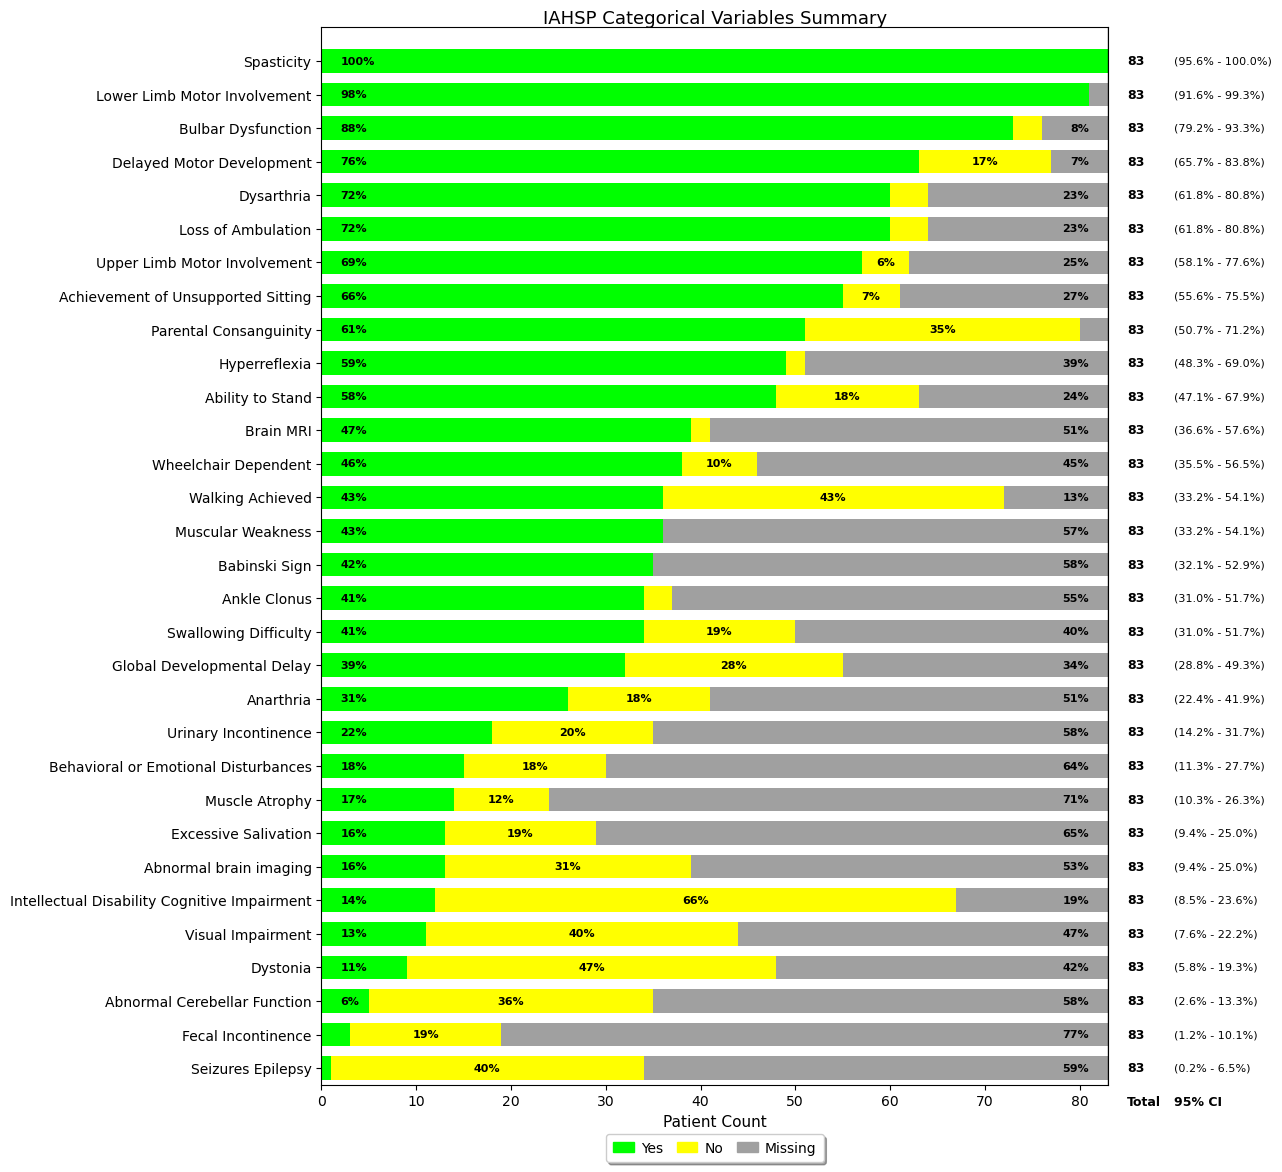

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# 1. Load and prepare the data
excel_path = "/Users/Emmanuel/Documents/Internship program/Clinical Statistics 2025/Data Base_ALSIN_3.2 March 2025.xlsx"
print(f"Loading data from: {excel_path}")

# Read the data with headers in the first row
iahsp_df = pd.read_excel(
    excel_path,
    sheet_name="Clinical_2025+",
    header=0  # First row contains the headers
)

# Clean column names
def clean_column_name(col):
    if pd.isna(col):
        return "Unnamed"
    col = str(col).strip()
    # Replace special characters and normalize spaces
    col = re.sub(r'[^\w\s]', ' ', col)
    col = re.sub(r'\s+', ' ', col)
    return col.strip()

iahsp_df.columns = [clean_column_name(col) for col in iahsp_df.columns]

# 2. Filter for IAHSP patients
pathology_col = next((col for col in iahsp_df.columns if 'pathology' in col.lower()), 'Pathology')

if pathology_col not in iahsp_df.columns:
    print("\nError: Could not find Pathology column. Available columns:")
    print(iahsp_df.columns.tolist())
    raise KeyError("Pathology column not found")

print(f"\nUsing column '{pathology_col}' for pathology information")

# Filter for IAHSP patients (case-insensitive)
iahsp_df = iahsp_df[iahsp_df[pathology_col].astype(str).str.upper() == 'IAHSP'].reset_index(drop=True)
TOTAL_PATIENTS = len(iahsp_df)
print(f"Number of IAHSP patients: {TOTAL_PATIENTS}")

if TOTAL_PATIENTS == 0:
    print("\nNo IAHSP patients found in the data. Please check the data and try again.")
else:
    print("\nData loaded successfully!")
    print(f"Total columns: {len(iahsp_df.columns)}")
    print(f"Total rows: {TOTAL_PATIENTS}")

# 3. Wilson score interval function
def wilson_score_interval(yes, total, z=1.96):
    if total == 0:
        return 0, 0
    p = yes / total
    n = total
    denominator = 1 + z**2/n
    centre_adjusted_probability = p + z*z / (2*n)
    adjusted_standard_deviation = np.sqrt((p*(1 - p) + z*z / (4*n)) / n)
    lower_bound = (centre_adjusted_probability - z*adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z*adjusted_standard_deviation) / denominator
    return lower_bound * 100, upper_bound * 100

# 4. Define columns to exclude from analysis
exclude_cols = [
    pathology_col, 
    'Origin of Parents', 
    'Family History of Disease',
    'Patient Identifier',
    'Mutation Allele 1',
    'cluster',
    'Allele_1_Protein_Change',
    'Allele_1_Variant_Type',
    'Allele_1_Consequence_Terms',
    'Allele_1_NMD_Prediction',
    'Mutation Allele 2',
    'Allele_2_Protein_Change',
    'Allele_2_Variant_Type',
    'Allele_2_Consequence_Terms',
    'Allele_2_NMD_Prediction',
    'Mutation Type',
    'Mutation Category',
    'Zygosity',
    'CADD Score Allele 1',
    'CADD Score Allele 2',
    'Reported Clinical Features',
    'Biological Sex'
]

# 5. Identify categorical columns
def is_categorical_column(col_name, exclude_list):
    col_lower = str(col_name).lower()
    if not isinstance(col_name, str):
        return False
    if col_name in exclude_list:
        return False
    if any(x in col_lower for x in ['age', 'date', 'time', 'year', 'id', 'identifier']):
        return False
    return True

categorical_cols = [col for col in iahsp_df.columns if is_categorical_column(col, exclude_cols)]

print(f"\nFound {len(categorical_cols)} categorical columns for analysis")
print("First 10 categorical columns:", categorical_cols[:10])

# 6. Summarize counts with recoding rules
summary_rows = []
for col in categorical_cols:
    try:
        # Handle missing values and convert to string
        series = iahsp_df[col].fillna("Missing").astype(str).str.strip()
        
        # Custom recoding for specific columns
        col_lower = col.lower()
        if 'dysarthria' in col_lower or 'anarthria' in col_lower:
            yes = ((series == "Yes") | (series == "NT")).sum()
            no = (series == "No").sum()
            other = (series == "NW").sum()
        elif 'loss of ambulation' in col_lower:
            yes = ((series == "Yes") | (series == "NW")).sum()
            no = (series == "No").sum()
            other = (series == "NT").sum()
        elif 'walking achieved' in col_lower:
            yes = (series == "Yes").sum()
            no = ((series == "No") | (series == "NW")).sum()
            other = (series == "NT").sum()
        else:
            yes = (series == "Yes").sum()
            no = (series == "No").sum()
            other = ((series == "NW").sum() if 'NW' in series.values else 0) + \
                    ((series == "NT").sum() if 'NT' in series.values else 0)
        
        missing = (series == "Missing").sum()
        
        # Ensure all counts sum to TOTAL_PATIENTS
        counted = yes + no + other + missing
        if counted < TOTAL_PATIENTS:
            missing += TOTAL_PATIENTS - counted
        elif counted > TOTAL_PATIENTS:
            overflow = counted - TOTAL_PATIENTS
            if missing >= overflow:
                missing -= overflow
            elif missing + other >= overflow:
                other -= (overflow - missing)
                missing = 0
            elif missing + other + no >= overflow:
                no -= (overflow - missing - other)
                other = 0
                missing = 0
            else:
                yes -= (overflow - missing - other - no)
                no = 0
                other = 0
                missing = 0
        
        ci_low, ci_up = wilson_score_interval(yes, TOTAL_PATIENTS)
        
        summary_rows.append({
            'Category': col,
            'Yes': yes,
            'No': no,
            'Other': other,
            'Missing': missing,
            'CI_Lower': ci_low,
            'CI_Upper': ci_up
        })
    except Exception as e:
        print(f"Error processing column '{col}': {str(e)}")
        continue

if not summary_rows:
    raise ValueError("No data available for analysis. Please check your data and column names.")

df = pd.DataFrame(summary_rows)
df = df.sort_values(by='Yes', ascending=True).reset_index(drop=True)

# Exclude variables with 100% missing
df = df[df['Missing'] < TOTAL_PATIENTS]
df = df.reset_index(drop=True)

print(f"\nSummary DataFrame shape (after filtering): {df.shape}")
print("\nFirst few rows of the summary:")
print(df.head())

# 7. Plotting with total count and CI on the right
if df.empty:
    print("No data to plot. Check your categorical columns and data.")
else:
    plt.style.use('default')
    n_vars = len(df)
    fig_height = max(6, 0.4 * n_vars)
    fig, ax = plt.subplots(figsize=(13, fig_height))

    ind = np.arange(n_vars)
    bar_height = 0.7

    colors = {
        "Yes": '#00FF00',      # Pure green
        "No": '#FFFF00',       # Pure yellow
        "Other": '#00FFFF70',  # Cyan, semi-transparent
        "Missing": '#A0A0A0'   # Pure grey
    }

    left_1 = df['Yes']
    left_2 = left_1 + df['No']
    left_3 = left_2 + df['Other']

    # Create the stacked bar chart
    bar1 = ax.barh(ind, df['Yes'], color=colors["Yes"], height=bar_height, label="Yes")
    bar2 = ax.barh(ind, df['No'], left=left_1, color=colors["No"], height=bar_height, label="No")
    bar3 = ax.barh(ind, df['Other'], left=left_2, color=colors["Other"], height=bar_height)
    bar4 = ax.barh(ind, df['Missing'], left=left_3, color=colors["Missing"], height=bar_height, label="Missing")

    # Configure plot appearance
    ax.set_yticks(ind)
    ax.set_yticklabels(df['Category'], fontsize=10)
    ax.set_xlabel("Patient Count", fontsize=11)
    ax.set_title("IAHSP Categorical Variables Summary", fontsize=13, pad=2)  # <-- n=83 removed

    # Set x-axis limits to exactly TOTAL_PATIENTS
    ax.set_xlim(0, TOTAL_PATIENTS)
    ax.set_ylim(-0.5, n_vars)

    # Add percentage annotations and right-side text
    for i in range(n_vars):
        total = TOTAL_PATIENTS
        yes = df.loc[i, 'Yes']
        no = df.loc[i, 'No']
        other = df.loc[i, 'Other']
        missing = df.loc[i, 'Missing']
        
        # Get confidence intervals
        ci_low = df.loc[i, 'CI_Lower']
        ci_up = df.loc[i, 'CI_Upper']

        # Add the total count on the right side
        ax.text(
            TOTAL_PATIENTS + 2, i, f"{TOTAL_PATIENTS}",
            ha='left', va='center', color='black', fontsize=9, fontweight='bold'
        )
        
        # Add confidence interval on the right side - moved closer to the total
        ax.text(
            TOTAL_PATIENTS + 7, i, f"({ci_low:.1f}% - {ci_up:.1f}%)",
            ha='left', va='center', color='black', fontsize=8
        )

        # Add percentage text
        pct_yes = yes / total if total else 0
        pct_no = no / total if total else 0
        pct_other = other / total if total else 0
        pct_missing = missing / total if total else 0
        
        # Yes (green) bars - left aligned
        if pct_yes > 0.05:  # Only show if >5%
            ax.text(
                2, i, f"{pct_yes:.0%}",
                ha='left', va='center', color='black', fontsize=8, fontweight='bold'
            )
        
        # Missing (grey) bars - right aligned
        if pct_missing > 0.05 and missing > 0:
            ax.text(
                TOTAL_PATIENTS - 2, i, f"{pct_missing:.0%}",
                ha='right', va='center', color='black', fontsize=8, fontweight='bold'
            )
        
        # No (yellow) bars - centered
        if pct_no > 0.05:
            ax.text(
                left_1[i] + no / 2, i, f"{pct_no:.0%}",
                ha='center', va='center', color='black', fontsize=8, fontweight='bold'
            )
        
        # Other (cyan) bars - centered
        if pct_other > 0.05:
            ax.text(
                left_2[i] + other / 2, i, f"{pct_other:.0%}",
                ha='center', va='center', color='black', fontsize=8, fontweight='bold'
            )

    # Add column headers on the right
    ax.text(TOTAL_PATIENTS + 2, -1, "Total", ha='left', va='center', fontweight='bold', fontsize=9)
    ax.text(TOTAL_PATIENTS + 7, -1, "95% CI", ha='left', va='center', fontweight='bold', fontsize=9)

    # Add a vertical line at x = TOTAL_PATIENTS to mark the total
    ax.axvline(x=TOTAL_PATIENTS, color='black', linestyle='-', alpha=0.7, linewidth=1)

    # Legend: only Yes, No, Missing
    legend_elements = [
        plt.Rectangle((0, 0), 1, 1, color=colors["Yes"], label="Yes"),
        plt.Rectangle((0, 0), 1, 1, color=colors["No"], label="No"),
        plt.Rectangle((0, 0), 1, 1, color=colors["Missing"], label="Missing")
    ]
    
    legend = ax.legend(
        handles=legend_elements,
        bbox_to_anchor=(0.5, -0.04),
        loc='upper center',
        ncol=3,
        frameon=True,
        fancybox=True,
        shadow=True,
        borderpad=0.5,
        handlelength=1.5,
        handletextpad=0.5,
        columnspacing=1.0
    )

    # Adjust layout for right text and legend
    plt.subplots_adjust(right=0.8, bottom=0.12)
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.draw()
    plt.show()


In [ ]:
# Load and prepare data
print("Loading data...")
file_path = "/Users/Emmanuel/Documents/Internship program/Clinical Statistics 2025/AData Base_ALSIN_3.2 March 2025.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet2')